In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cubicspline(x,y):
    x = np.array(x)
    y = np.array(y)
    n = len(x) - 1  # We have n + 1 points
    A = np.zeros((4*n, 4*n))
    b = np.zeros(4*n)
    
    j = np.arange(0, 4*n, 4)
    i = np.arange(0, 4*n, 2)
    i = i[:len(j)]
    A[i, j] = x[:-1]**3
    A[i, j+1] = x[:-1]**2
    A[i, j+2] = x[:-1]
    A[i, j+3] = 1
    A[i+1, j] = x[1:]**3
    A[i+1, j+1] = x[1:]**2
    A[i+1, j+2] = x[1:]
    A[i+1, j+3] = 1 
    k = np.arange(0, 4*n, 2)[:len(j)]
    b[k] = y[:-1]
    b[k+1] = y[1:]

    i = np.arange(2*n, 4*n)[:len(j)-1]
    j = j[:-1]
    A[i, j] = 3*x[1:-1]**2
    A[i, j+1] = 2*x[1:-1]
    A[i, j+2] = 1
    A[i, j+4] = -3*x[1:-1]**2
    A[i, j+5] = -2*x[1:-1]
    A[i, j+6] = -1

    i = i + n - 1
    A[i, j] = 6*x[1:-1]
    A[i, j+1] = 2
    A[i, j+4] = -6*x[1:-1]
    A[i, j+5] = -2

    # Natural spline equations
    A[4*n-2, 0] = 6*x[0]
    A[4*n-2, 1] = 2
    A[4*n-1, 4*n-4] = 6*x[-1]
    A[4*n-1, 4*n-3] = 2

    coefs = np.linalg.solve(A,b)    
    return np.array([coefs[::4], coefs[1::4], coefs[2::4], coefs[3::4]])

x = [0, 1, 2, 3, 4]
y = [21, 24, 24, 18, 16]
print(" coefficients are")
print(cubicspline(x,y))
        

 coefficients are
[[ -0.30357143  -1.48214286   3.23214286  -1.44642857]
 [  0.           3.53571429 -24.75        17.35714286]
 [  3.30357143  -0.23214286  56.33928571 -69.98214286]
 [ 21.          22.17857143 -15.53571429 110.78571429]]


     j        ai        bi        ci        di    
   0 - 1      0.0105    0.0000   -0.9749    1.5000
   1 - 2      0.1021   -0.1698   -0.8700    1.4784
   2 - 3      0.9872   -2.6524    1.4513    0.7549
   3 - 4     -1.7735    7.7417  -11.5933    6.2119
   4 - 5      5.3946  -27.4394   45.9630  -25.1755
   5 - 6     -3.3933   22.7835  -49.7116   35.5779
   6 - 7      0.6706   -5.4652   15.7407  -14.9731
   7 - 8     -0.1474    1.4729   -3.8736    3.5101


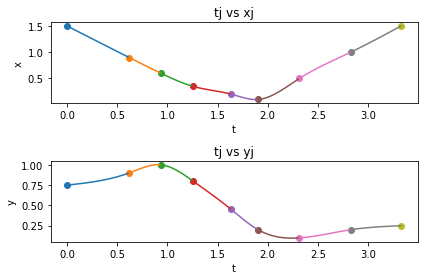

     j        ai        bi        ci        di    
   0 - 1      0.2769    0.0000    0.1369    0.7500
   1 - 2     -3.0010    6.0773   -3.6188    1.5237
   2 - 3      2.4305   -9.1579   10.6261   -2.9160
   3 - 4     -0.2732    1.0213   -2.1488    2.4282
   4 - 5      2.1739  -10.9890   17.5000   -8.2870
   5 - 6     -0.7844    5.9176  -14.7071   12.1646
   6 - 7     -0.4742    3.7616   -9.7117    8.3064
   7 - 8      0.1725   -1.7231    5.7937   -6.3048


In [2]:
tj = [0   , 0.618, 0.935, 1.255, 1.636, 1.905, 2.317, 2.827, 3.330]
xj = [1.50, 0.90 , 0.60 , 0.35 , 0.20 , 0.10 , 0.50 , 1.00 , 1.50 ]
yj = [0.75, 0.90 , 1.00 , 0.80 , 0.45 , 0.20 , 0.10 , 0.20 , 0.25 ]
import matplotlib.pyplot as plt

def print_fixed_n(n):
    print("{:10.4f}".format(n), end='') # or print "{:10.4f}".format(x


def print_fixed_s(s, length):
    # The function prints a string with fixed length
    half_len_diff = (length - len(s))/2
    if half_len_diff%1 != 1:
        left = int(np.ceil(half_len_diff))
    else:
        left = int(half_len_diff)
    right = int(np.floor(half_len_diff))

    for i in range(left):
         print(' ', end='')
    print(s, end='')
    for i in range(right):
        print(' ', end='')


def calc_third_poly(a, b, c, d, x):
    return a*x**3 + b*x**2 + c*x + d

spline_tx = cubicspline(tj, xj)
for charac in ['j', 'ai', 'bi', 'ci', 'di']:
    print_fixed_s(charac, 10)
print()
for j in range(len(spline_tx[0])):
    print_fixed_s(f'{j} - {j+1}', 10)
    for coef in spline_tx[:,j]:
        print_fixed_n(coef)
    print()

fig, axs = plt.subplots(2)
x = []
y = []
for j in range(len(spline_tx[0])):
    x_between_points = np.linspace(tj[j], tj[j+1], 50)
    y_between_points = calc_third_poly(spline_tx[0,j], spline_tx[1,j], spline_tx[2,j], spline_tx[3,j], x_between_points)
    x.append(x_between_points)
    y.append(y_between_points)
    axs[0].plot(x_between_points, y_between_points)
    axs[0].scatter(tj[j], xj[j])
axs[0].scatter(tj[-1], xj[-1])
axs[0].set_title('tj vs xj')
axs[0].set_ylabel('x')
axs[0].set_xlabel('t')

spline_ty = cubicspline(tj, yj)
x = []
y = []
for j in range(len(spline_tx[0])):
    x_between_points = np.linspace(tj[j], tj[j+1], 50)
    y_between_points = calc_third_poly(spline_ty[0,j], spline_ty[1,j], spline_ty[2,j], spline_ty[3,j], x_between_points)
    x.append(x_between_points)
    y.append(y_between_points)
    axs[1].plot(x_between_points, y_between_points)
    axs[1].scatter(tj[j], yj[j])
axs[1].scatter(tj[-1], yj[-1])
axs[1].set_title('tj vs yj')
axs[1].set_ylabel('y')
axs[1].set_xlabel('t')
plt.tight_layout()
plt.show()

for charac in ['j', 'ai', 'bi', 'ci', 'di']:
    print_fixed_s(charac, 10)
print()
for j in range(len(spline_ty[0])):
    print_fixed_s(f'{j} - {j+1}', 10)
    for coef in spline_ty[:,j]:
        print_fixed_n(coef)
    print()